# The beginnings...
The most basic, first example from the Google machine learning crash course.

Main takeaways:
 - the median_income feature is a good predictor of house prices
 - this can be also learnt from a simple correlation chart

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from helper import charts

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [3]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  return history

In [4]:
# The following variables are the hyperparameters.
learning_rate = 0.1
epoch_count = 10
batch_size = 256

# Specify the feature and the label.
my_feature = "median_income"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.

# Invoke the functions.
my_model = build_model(learning_rate)
history = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epoch_count, batch_size)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/10


2023-02-18 22:59:10.937261: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-18 22:59:10.937389: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-18 22:59:11.096529: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/67 [===>..........................] - ETA: 0s - loss: 55408.8516 - root_mean_squared_error: 235.3909 

2023-02-18 22:59:11.258506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 1s 6ms/step - loss: 49269.5469 - root_mean_squared_error: 221.9675
Epoch 2/10
67/67 [==============================] - 0s 6ms/step - loss: 36211.3906 - root_mean_squared_error: 190.2929
Epoch 3/10
67/67 [==============================] - 0s 5ms/step - loss: 25779.3496 - root_mean_squared_error: 160.5595
Epoch 4/10
67/67 [==============================] - 0s 5ms/step - loss: 17700.5078 - root_mean_squared_error: 133.0433
Epoch 5/10
67/67 [==============================] - 0s 5ms/step - loss: 11950.8232 - root_mean_squared_error: 109.3198
Epoch 6/10
67/67 [==============================] - 0s 6ms/step - loss: 8511.7803 - root_mean_squared_error: 92.2593
Epoch 7/10
67/67 [==============================] - 0s 5ms/step - loss: 7165.3857 - root_mean_squared_error: 84.6486
Epoch 8/10
67/67 [==============================] - 0s 5ms/step - loss: 7013.3994 - root_mean_squared_error: 83.7460
Epoch 9/10
67/67 [==============================] - 0s 5ms/step -

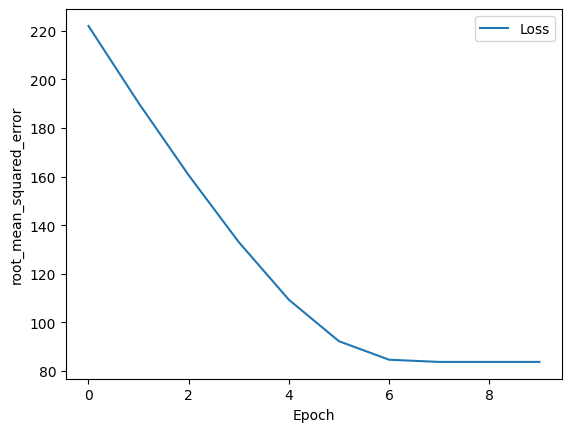

In [5]:
#plot error decrease overtime
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]
charts.plot_training_loss(rmse)

7/7 [==============================] - 0s 2ms/step


2023-02-18 22:59:15.283021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


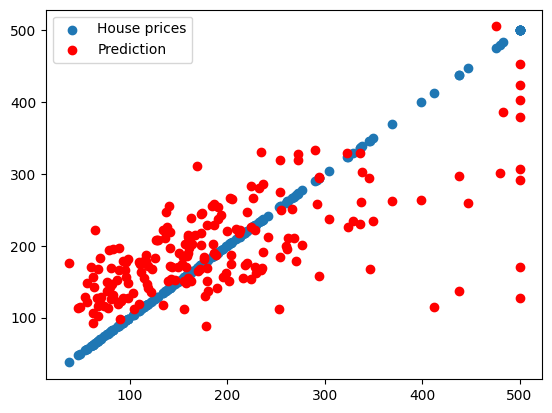

In [6]:
sample = training_df.sample(n=200, ignore_index=True)

features = sample[my_feature]
predictions = my_model.predict(features).ravel()

sample["prediction"] = predictions

charts.plot_model_accuracy(sample, my_label, label="House prices")